In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# air_quality_no2_long.csv
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv")

In [5]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [9]:
# 도시의 측정 빈도
city_counts = air_quality['city'].value_counts()

<BarContainer object of 3 artists>

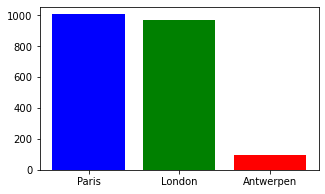

In [12]:
plt.figure(figsize =(5,3)) # 가로 5 세로 3
plt.bar(city_counts.index, city_counts.values,
       color = ['blue', 'green', 'red'])

<BarContainer object of 3 artists>

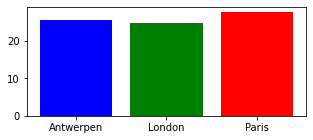

In [15]:
# 2) 도시별 평균 이산화질소 농도
city_avg = air_quality.groupby('city')['value'].mean()

plt.figure(figsize = (5,2))
plt.bar(city_avg.index, city_avg.values, color = ['blue', 'green', 'red'])

In [17]:
# 히스토그램 : Paris의 이산화질소 농도 분포
paris_data = air_quality[air_quality['city'] == "Paris"]


(array([ 43., 308., 274., 184.,  92.,  53.,  24.,  17.,   7.,   2.]),
 array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ]),
 <BarContainer object of 10 artists>)

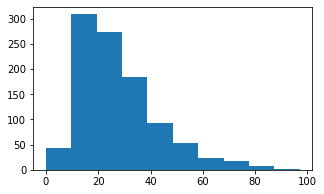

In [23]:
plt.figure(figsize = (5,3))
plt.hist(paris_data["value"], bins = 10)  # bins = 막대개수

In [25]:
# 히스토그램 : Paris의 이산화질소 농도 분포
paris_data = air_quality[air_quality['city'] == "Paris"]
london_data = air_quality[air_quality['city'] == "London"]
antwerpen_data = air_quality[air_quality['city'] == "Antwerpen"]

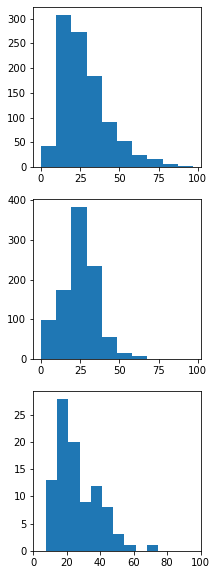

In [34]:
plt.figure(figsize = (3,10))

plt.subplot(3,1,1)
plt.hist(paris_data["value"], bins = 10)
plt.subplot(3,1,2)

plt.hist(london_data["value"], bins = 10)
plt.subplot(3,1,3)
plt.xlim(0,100)


plt.hist(antwerpen_data["value"], bins = 10)
plt.show()

In [35]:
# 산점도
import seaborn as sns
tips = sns.load_dataset("tips")

In [41]:
tips['time'].map({'Lunch': 'orrange',  'Dinner': 'gray'})

0      gray
1      gray
2      gray
3      gray
4      gray
       ... 
239    gray
240    gray
241    gray
242    gray
243    gray
Name: time, Length: 244, dtype: category
Categories (2, object): ['orrange', 'gray']

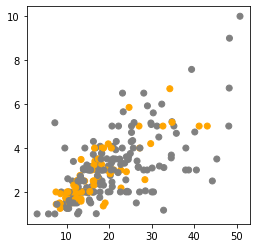

In [49]:
# 지불금액이 증가할 수록 팁도 증가하는 경향을 띰

plt.figure(figsize = (4,4))
plt.scatter(tips['total_bill'], tips['tip'], 
            c = tips['time'].map({'Lunch': 'orange', 'Dinner': 'gray'}))

(-0.5, 5670.5, 3780.5, -0.5)

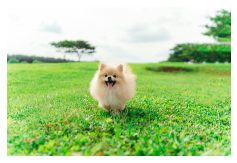

In [60]:
from PIL import Image
img = Image.open('puppy.jpg')
plt.figure(figsize = (4,3))
plt.imshow(img)
plt.axis('off') # 축 안 보고 싶어..

In [61]:
img_array = np.array(img)

In [63]:
img_array.shape  # ( , , 3) 3은 고정임, 빨 초 파

(3781, 5671, 3)

In [64]:
img_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 252, 251],
        [250, 252, 251],
        [251, 253, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [249, 251, 250],
        [249, 251, 250],
        [249, 251, 250]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [248, 250, 249],
        [248, 250, 249],
        [248, 250, 249]],

       ...,

       [[192, 223,  83],
        [192, 223,  83],
        [193, 224,  84],
        ...,
        [207, 240, 195],
        [206, 239, 194],
        [206, 239, 192]],

       [[192, 223,  83],
        [192, 223,  83],
        [193, 224,  84],
        ...,
        [206, 239, 194],
        [206, 239, 194],
        [205, 238, 191]],

       [[192, 223,  83],
        [192, 223,  83],
        [193, 224,  84],
        ...,
        [206, 239, 194],
        [205, 238, 191],
        [205, 238, 191]]

#### 4.3.3.2. 색상 채널과 픽셇 단위 조작 

In [66]:
# 채널 분리
r = img_array[:, :, 0]
g = img_array[:, :, 1]
b = img_array[:, :, 2]

In [67]:
r

array([[255, 255, 255, ..., 250, 250, 251],
       [255, 255, 255, ..., 249, 249, 249],
       [255, 255, 255, ..., 248, 248, 248],
       ...,
       [192, 192, 193, ..., 207, 206, 206],
       [192, 192, 193, ..., 206, 206, 205],
       [192, 192, 193, ..., 206, 205, 205]], dtype=uint8)

In [69]:
r.shape

(3781, 5671)

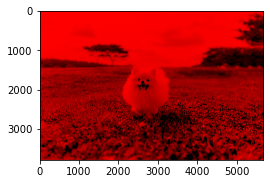

In [75]:
# 단일 채널만 유지
# r(레드채널) 뽑았음
r_img = img_array.copy()
r_img[:, :, [1, 2]] = 0


plt.figure(figsize = (4,3))
plt.imshow(r_img)

In [76]:
# 단일 채널만 유지
r_img = img_array.copy()
r_img[:, :, [1,2]] = 0

g_img = img_array.copy()
g_img[:, :, [0,2]] = 0

b_img = img_array.copy()
b_img[:, :, [0,1]] = 0

In [78]:
r_img.shape

(3781, 5671, 3)

In [81]:
# np.concatenate() : 여러 배열을 지정한 축에 따라 이어 붙이는 함수
# 좌우로 이미지를 이어 붙어야 겠다! -> 열 방향으로 이어 붙인다. axis = 1
combind_img = np.concatenate([r_img, g_img, b_img], axis = 1)
combind_img.shape

(3781, 17013, 3)

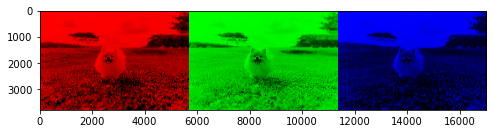

In [83]:
plt.figure(figsize = (8,5))
plt.imshow(combind_img)

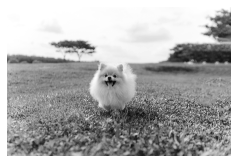

In [86]:
# 흑백 변환 채널 세개를 하나로 줄였으니 2차원 배열임
gray_img = img_array.mean(axis = 2)

plt.figure(figsize = (4,3))
plt.imshow(gray_img, cmap = 'gray')
plt.axis('off')
plt.show()

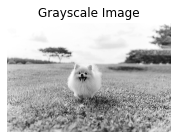

In [92]:
# img_array.mean(axis = 2)
# (r + g + b) / 3 = 0.333 * r + 0.333 * g + 0.333 * b
# 흑백 변환 : 가중 평균
gray_img_weightend =  r * 0.2989 + g * 0.5870 + b * 0.1140

plt.figure(figsize=(4, 2))
plt.imshow(gray_img_weightend, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

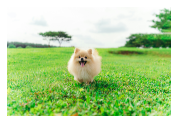

In [96]:
# 정규화 : 픽셀 값을 0 ~ 1 사이의 실수로 변환
img_noemalized = img_array / 255.0

plt.figure(figsize=(4, 2))
plt.imshow(img_noemalized)
plt.axis('off')
plt.show()

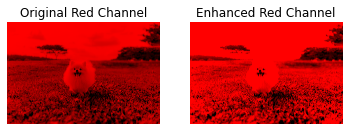

In [107]:
# 특정 채널만 강조 : Red channel의 값을 1.5배 하자! (레드 컬러 강조)
# 255 넘어버림
# np.clip() : 넘파이 배열의 값들을 지정한 최소값, 최대값 사이로 제한하는 함수
# 8비트 unsighed integer
r_enhanced = np.clip(r * 1.5, 0, 255).astype(np.uint8)

img_red_original = img_array.copy()
img_red_original[:, :, [1,2]] = 0

img_red_enhanced =  img_array.copy()
img_red_enhanced[:, :, [1,2]] = 0
img_red_enhanced[:, :, 0] = r_enhanced

plt.subplot(1, 2, 1)
plt.imshow(img_red_original)
plt.title('Original Red Channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_red_enhanced)
plt.title('Enhanced Red Channel')
plt.axis('off')

plt.show()

In [ ]:
# 채널 합성
# np.stack() : 여러 배열을 새로운 축(axis)을 추가하여 쌓아 3차원 이상의 배열을 만드는 함수
modified_img = np.stack([r_enhanced, g, b], axis=2)

plt.figure(figsize=(4, 4))
plt.imshow(modified_img)
plt.title('Modified Image')
plt.axis('off')
plt.show()